## 데이터 시각화

데이터가 많다면 평균, 표준편차, 4분위수와 같은 통계량을 출력할 수 있다. 하지만 통계량이 모두 동일하다고 해도 시각화 했을 때 다르게 그려질 수 있다.


### 데이터 타입별 시각화: 수치형 x 수치형

1. scatterplot
2. lmplot
3. jointplot

### 데이터 타입별 시각화: 수치형 x 카테고리형

1. boxplot, violinplot
2. barplot
3. heatmap

### 데이터 타입별 시각화: 수치형 x 위치정보
folium 라이브러리 활용

In [1]:
# 시각화를 위해 seaborn 라이브러리를 불러온다.
import seaborn as sns

seaborn에는 예제로 활용할 수 있는 데이터셋이 연결되어 있다. tips 데이터셋을 불러온다. 불러온 데이터 셋은 판다스의 데이터프레임 형식으로 판다스와 동일한 명령어를 사용할 수 있다.

In [2]:
raw = sns.load_dataset('tips')

In [3]:
raw.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [4]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.3 KB


### seaborn 함수 기본 형태

sns.scatterplot ( data = 데이터프레임, x = 'total_bill', y = 'tip', hue = 'sex')

- scatterplot: 그래프 종류
- data: 실제 값
- x,y: data의 column
- hue: 색상구분의 기준 column

## 데이터 분포 살펴보기(수치형 vs 수치형)

relplot ( data = df, x= , y= , hue= , kine='scatter')<br>
두 개의 변수(모두 수치형 데이터)분포를 확인할 때
- kind 옵션
    - 'scatter' (기본값)
    - 'line'

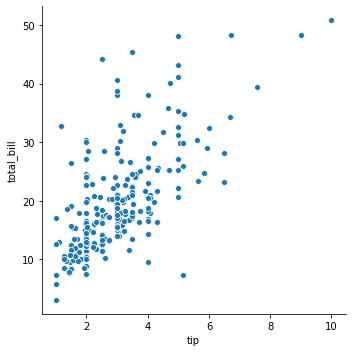

In [7]:
sns.relplot(data=raw, x='tip',y='total_bill')

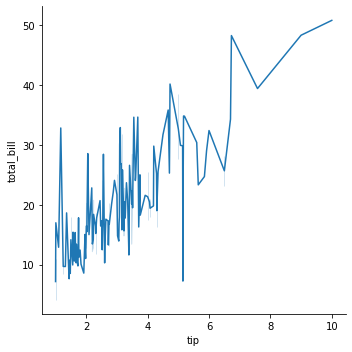

In [8]:
sns.relplot(data=raw, x='tip',y='total_bill',kind='line')

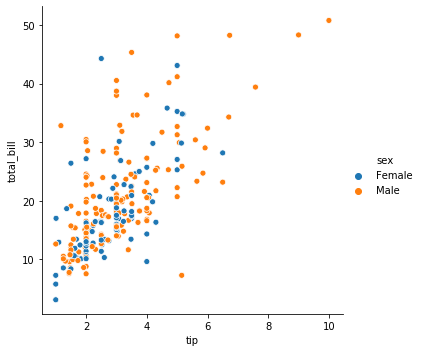

In [10]:
sns.relplot(data=raw,x='tip',y='total_bill',hue='sex')

## 관계 살펴보기(수치형 vs 수치형)

jointplot(data=df, x=, y=, kind='scatter')<br>
- kind에 따라 그래프 형태 변경됨
     - "scatter": point
     - "regg": point + regression
     - "kde": 누적 분포 차트

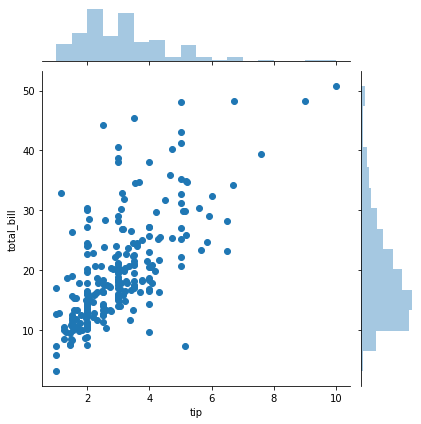

In [11]:
#각 축에 대한 분포도 같이 나타남
sns.jointplot(data = raw, x = 'tip', y='total_bill')

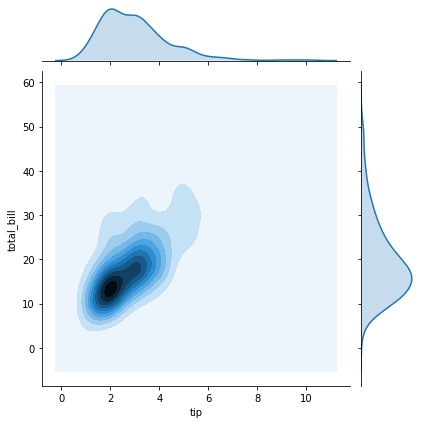

In [12]:
#밀도 함수
sns.jointplot(data = raw, x = 'tip', y='total_bill', kind='kde')

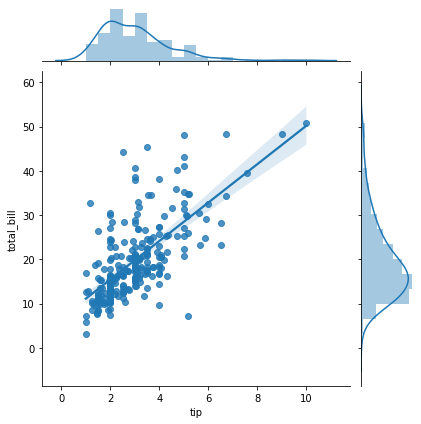

In [13]:
#회귀선
sns.jointplot(data = raw, x = 'tip', y='total_bill', kind='regg')

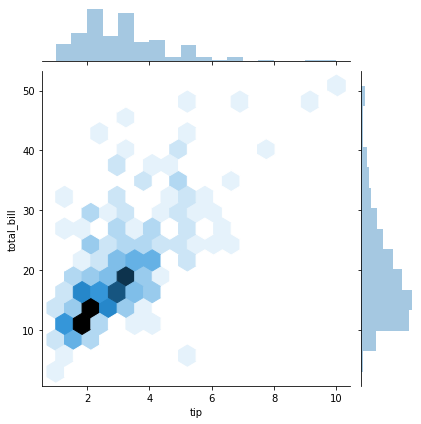

In [14]:
#육각형 모양(kde의 육각형 버전)
sns.jointplot(data = raw, x = 'tip', y='total_bill', kind='hex')

pairplot(data = df)
<br>df의 모든 수치형데이터 컬럼에서 두 컬럼에서 두 컬럼씩 관계를 시각화 합니다.

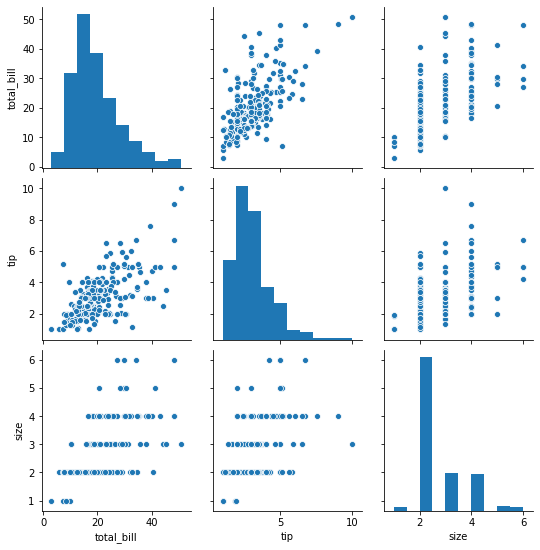

In [16]:
sns.pairplot(data= raw)

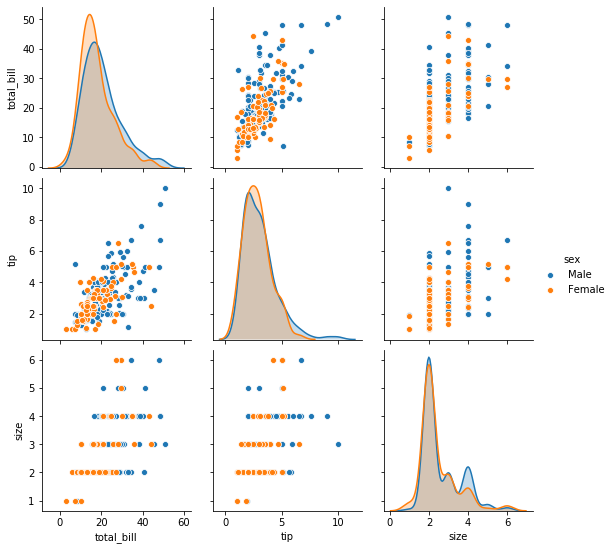

In [18]:
#hue를 이용해 특정 컬럼의 값에 따른 분포를 색상을 이용해 시각화 할 수 있다.
sns.pairplot(data = raw, hue='sex')

## 데이터 분포 살펴보기 (수치형 vs 카테고리형)

boxplot (data =df, x=, y=, hue= )

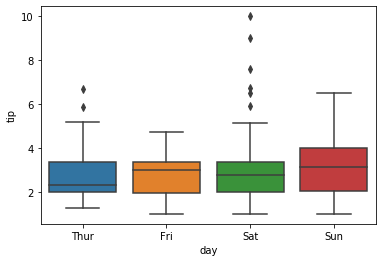

In [21]:
#가로축을 category, 세로축을 수치형으로 설정한다.
# 점은 이상치에 해당한다.
sns.boxplot(data=raw,x='day',y='tip')

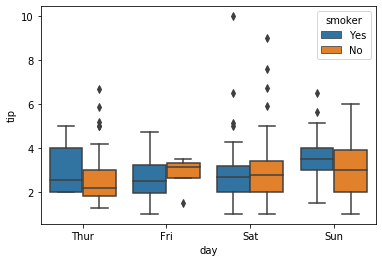

In [22]:
sns.boxplot(data=raw,x='day',y='tip',hue='smoker')

boxplot의 경우는 하나의 기준에 대한 데이터 분포 범위를 파악하는데 용이하나, 데이터의 개수를 표현하지는 않기 때문에 데이터 개수가 다른 값을 비교하기에는 문제가 있을 수 있다. 따라서 swarmplot을 이용하면 데이터 개수가 함께 분포를 살펴볼 수 있다.

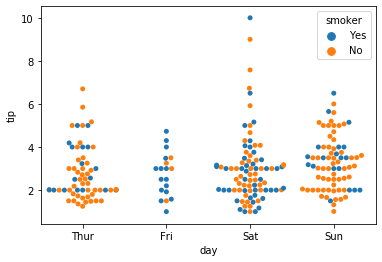

In [23]:
sns.swarmplot(data=raw, x='day',y='tip',hue='smoker')

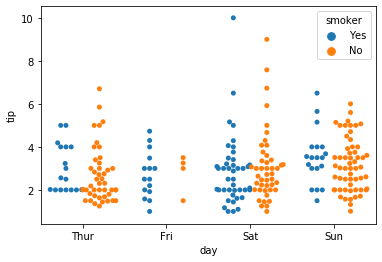

In [26]:
#겹치지 않게 그리기위해 dodge 옵션을 추가한다.
sns.swarmplot(data=raw, x='day',y='tip',hue='smoker',dodge=True)

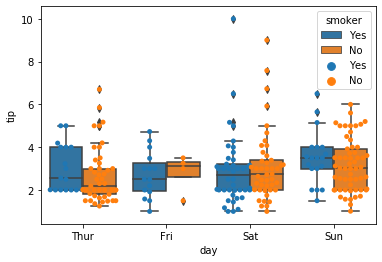

In [27]:
#boxplot과 swarmplot을 같이 그릴 수 있다.
sns.boxplot(data=raw,x='day',y='tip',hue='smoker')
sns.swarmplot(data=raw, x='day',y='tip',hue='smoker',dodge=True)

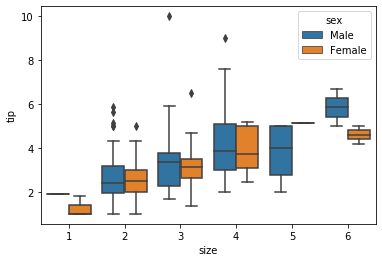

In [29]:
#이번에는 size/성별 별 tip의 분포를 살펴보도록 한다.
sns.boxplot(data=raw,x='size',y='tip',hue='sex')

barplot(data=df,x=,y=,hue=)

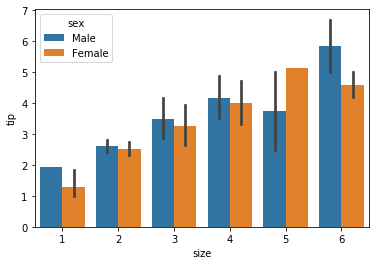

In [31]:
sns.barplot(data=raw,x='size',y='tip',hue='sex')

## 데이터 분포 살펴보기(수치형 vs 카테고리형 vs 카테고리형)

heatmap(data=df)

In [32]:
raw.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


히트맵을 이용하면, 두 카테고리형 데이터 분포에 대한 수치형데이터의 값을 한눈에 색상을 이용하여 알 수 있다. 요일별, size별, 평균 tip 데이터를 가진 피벗테이블을 만들어본다.

In [34]:
df = raw.pivot_table(index='day',columns='size',values='tip',aggfunc='mean')
df

size,1,2,3,4,5,6
day,,,,,,
Thur,1.83,2.442500,2.692500,4.218000,5.000000,5.3
Fri,1.92,2.644375,3.000000,4.730000,NaN,NaN
Sat,1.00,2.517547,3.797778,4.123846,3.000000,NaN
Sun,NaN,2.816923,3.120667,4.087778,4.046667,5.0


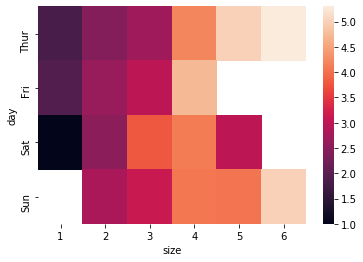

In [36]:
#보고자하는 관점에 따라 데이터프레임을 만든 후 heapmap을 사용한다.
sns.heatmap(data=df)

실제 데이터를 확인하기 위해, 히트맵 내에 수치를 표현할 수 있다. annot=True로 할 경우 수치를 표현하며, 표현되는 숫자 형태는 fmt 옵션으로 지정할 수 있다.<br>
fmt='.2f'의 경우 소수점 두번째자리까지 표현하라는 의미다.

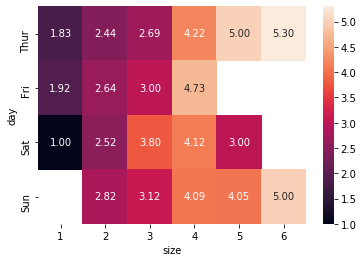

In [37]:
sns.heatmap(data=df,annot=True,fmt='.2f')

cmap 옵션을 이용해 색상을 조정할 수 있다.

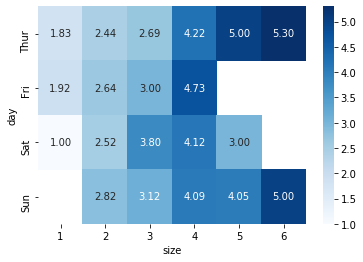

In [39]:
sns.heatmap(data=df,annot=True,fmt='.2f',cmap='Blues')

### heatmap 사용법

sns.heatmap(data=df, annot=True, fmt='.1f', cmap='RdBu_r')

cmap: Reds, Blues, vlag,Pastel1